In [1]:
#importing the necessary modules
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as pio
import kaleido
import textwrap
from wordcloud import WordCloud, STOPWORDS

from utils_added import *

%load_ext autoreload
%autoreload 2

In [2]:
#reading data from main notebook 
%store -r data

##### Creation of dataframes 

In [3]:
# creating a column for work type
data.loc[data["Work description"] < 3, "Work type" ] = "Imaging"
data.loc[(data["Work description"] >= 3) & (data["Work description"] <= 5), "Work type"] = "Balanced"
data.loc[data["Work description"] > 5, "Work type"] = "Analyst"

In [4]:
#Usage of image sc forum 
data['Usage of image sc forum'] = data['Approach to solutions'].dropna().apply(lambda x:True if 'Ask on forum.image.sc' in x else False)
forum_work_df = data.loc[:, ('Work type', 'Usage of image sc forum')]
forum_usage_df = forum_work_df.groupby('Usage of image sc forum').get_group(True).value_counts().reset_index()
forum_usage_df= forum_usage_df.rename(columns={0:'counts', 'Work type':'work type_1'})
# work type counts 
work_type_counts = data['Work type'].value_counts().reset_index()
#dataframe to calculate percentage 
per_sc_usage_df = pd.concat([forum_usage_df, work_type_counts], axis=1)
per_sc_usage_df['percentage'] = (per_sc_usage_df['counts']/per_sc_usage_df['Work type'])*100
per_sc_usage_df['percentage']= per_sc_usage_df['percentage'].round(decimals=2)
per_sc_usage_df= per_sc_usage_df.sort_values(by='percentage', ascending=True)

In [5]:
per_sc_usage_df.to_csv('C:\\Users\\ssivagur\\Documents\\GitHub\\2023_ImageAnalysisSurvey\\csv files\\usage_sc_forum.csv')

In [3]:
# wordcloud for well solved image analysis problems_2020
well_solved_2020_url = 'https://raw.githubusercontent.com/ciminilab/2021_Jamali_BiologicalImaging/main/AnonymizedSurveyQuestions/What_image_analysis_problems_ie_finding_nuclei_tissue_analysis_analysis_of_super-resolution_data_etc_do_you_think_are_generally_well-solved.csv'
well_solved_2020 = pd.read_csv(well_solved_2020_url)
well_solved_2020 = well_solved_2020.rename(columns= {'0':'Well solved image analysis problems-2020'})

In [4]:
# wordcloud for image analysis problems which need better solutions -2021
better_sol_2020_url = 'https://raw.githubusercontent.com/ciminilab/2021_Jamali_BiologicalImaging/main/AnonymizedSurveyQuestions/What_image_analysis_problems_ie_finding_nuclei_tissue_analysis_analysis_of_super-resolution_data_etc_do_you_wish_had_easier_better_solutions.csv'
better_sol_2020 = pd.read_csv(better_sol_2020_url)
better_sol_2020 = better_sol_2020.rename(columns= {'0':'Image analysis problems that need better solutions-2020'})

##### Creation of the figure

In [7]:
sc_usage_fig = px.bar(per_sc_usage_df, per_sc_usage_df['index'], y=per_sc_usage_df['percentage'], text_auto=True, width=500, height=500,labels={'index':'', 'percentage':'Percent'}, title='Usage of image sc forum')
sc_usage_fig.update_layout(width=500, height=500, title_x=0.5, title_y=0.95, font=dict(family='Helvetica', color="Black", size=16), legend=dict(title_font_family = 'Helvetica', font=dict(size=16, color="Black")))
#sc_usage_fig.write_image('sc_usage_fig.svg')

c:\Users\ssivagur\Documents\GitHub\2023_ImageAnalysisSurvey\notebooks\utils_added.py:419: FutureWarning: The default value of regex will change from True to False in a future version.
  input = ''.join(series.str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' ')) #splitting the strings and replacing the spaces or special characters


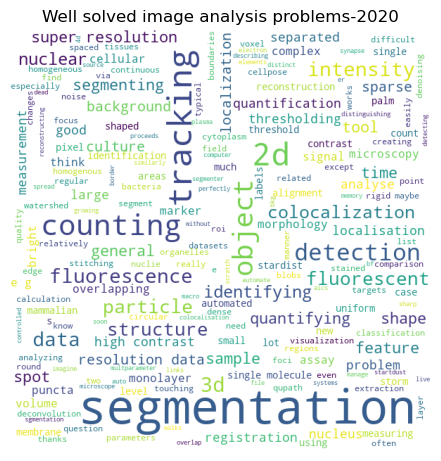

In [5]:
wordcloud(well_solved_2020["Well solved image analysis problems-2020"], extra_stopwords=['finding nuclei','finding', 'nuclei', 'tissue','analysis', 'analysis of super-resolution data', 'cell', 'cells', 'etc', 'image', 'images', 'well', 
             'solved', 'imaging', 'better', 'simple', 'different', 'non', 'within', 'depend', 'none', 'things', 'easy', 'many', 'almost', 'common', 
             'though', 'n', 'depends', 'number', 'made', 'seem', 'show', 'particularly', 'co', 'size', 'types', 'every', 'possible', 'based', 'generally', 'semi', 'work', 'don', 't', 'basic'])

c:\Users\ssivagur\Documents\GitHub\2023_ImageAnalysisSurvey\notebooks\utils_added.py:419: FutureWarning: The default value of regex will change from True to False in a future version.
  input = ''.join(series.str.lower().str.split().dropna(how='all').astype(str).str.replace(r'[-./?!,":;()\']',' ')) #splitting the strings and replacing the spaces or special characters


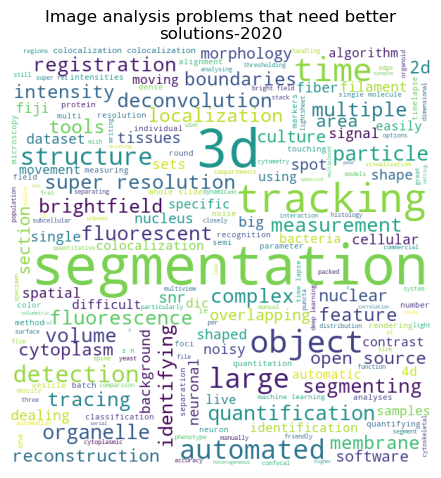

In [6]:
wordcloud(better_sol_2020["Image analysis problems that need better solutions-2020"], extra_stopwords=['finding nuclei','finding', 'nuclei', 'tissue', 'analysis', 'analysis of super-resolution data', 'image', 'images', 'imaging', 'e', 'g', 
             'cell', 'em', 'non', 'etc', 'cells', 'better', 'find', 'easy', 'sample', 'well', 'don', 't', 'different', 'without','many', 'change', 'high', 'especially', 
             'low', 'good', 'tool', 'based', 'things', 'changes','within', 'problem', 'small', 'working', 'data', 
             'analyzing','set', 'often', 'easier', 'clearly', 'types', 'general', 'anything', 'co', 'work', 'highly', 'need', 'way', 're'])